In [25]:
!pip install wikipedia

In [27]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [29]:
base=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\Python Scripts\baseball.csv')

In [31]:
base.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
base.shape

(30, 17)

In [6]:
base.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
base.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

information about features

In [ ]:
features = 'Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Errors'.split(',')
feature_dict = {}
for feat in features:

    try:
        summary = wikipedia.summary('{}'.format(feat),sentences=2)
        
    except:
        try:
          
            summary = wikipedia.summary('{} in baseball'.format(feat),sentences=2)
        except:
            wikipedia.summary('{} baseball'.format(feat),sentences=2)
    feature_dict[feat] = summary
    

In [10]:

feature_dict

{'Runs': 'In baseball, a run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured. A player may score by hitting a home run or by any combination of plays that puts him safely "on base" (that is, on first, second, or third) as a runner and subsequently brings him home.',
 'At Bats': "In baseball, an at bat (AB) or time at bat is a batter's turn batting against a pitcher. An at bat is different from a plate appearance.",
 'Hits': "In baseball statistics, a hit (denoted by H), also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice.\n\n\n== Scoring a hit ==\nTo achieve a hit, the batter must hit the ball even if any fielder can either tag him with the ball, thr

In [11]:
# replacing the abbrevations with Complete word redability and enhancing interpretation
base.columns='Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')

In [12]:
base

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:>

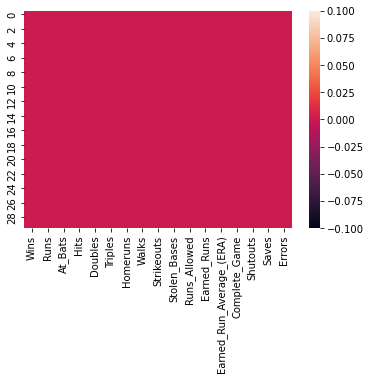

In [13]:
sns.heatmap(base.isna())

In [14]:
base.corr()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

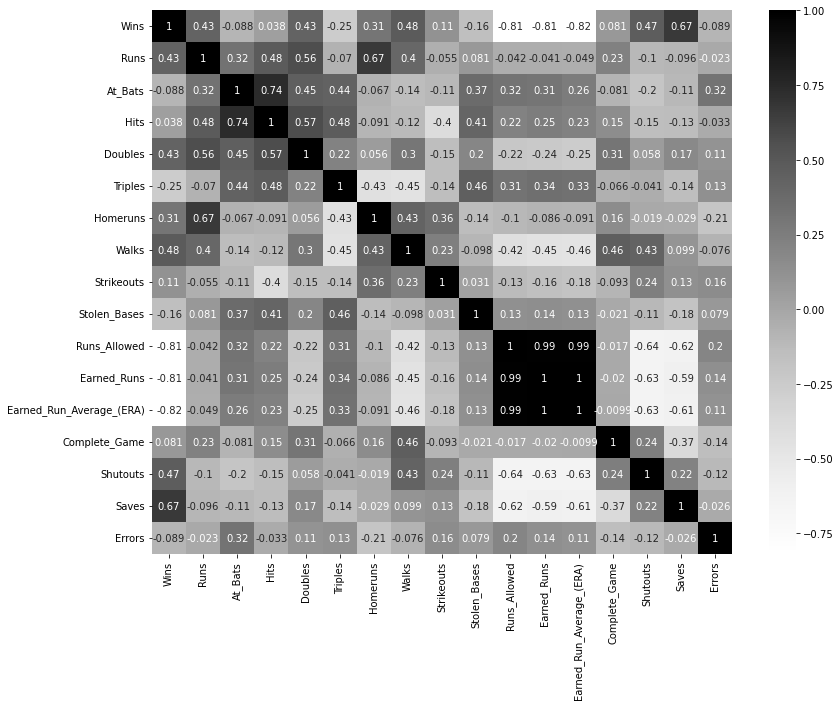

In [15]:
# plot the correaltion
plt.figure(figsize=(13,10))
sns.heatmap(base.corr(),annot=True,cmap='Greys')

1-Note that there are three highly correlated features.
2-They are as follows:
    a)-Runs Allowed
    b)-Earned Runs
    c)-Earned_RunesAverage(AVG)

In [16]:
base.corr()['Earned_Runs']

Wins                       -0.809435
Runs                       -0.041245
At_Bats                     0.309686
Hits                        0.252489
Doubles                    -0.235531
Triples                     0.340225
Homeruns                   -0.085922
Walks                      -0.452663
Strikeouts                 -0.161612
Stolen_Bases                0.143068
Runs_Allowed                0.991018
Earned_Runs                 1.000000
Earned_Run_Average_(ERA)    0.997248
Complete_Game              -0.020221
Shutouts                   -0.630192
Saves                      -0.589663
Errors                      0.136921
Name: Earned_Runs, dtype: float64

In [17]:
base

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


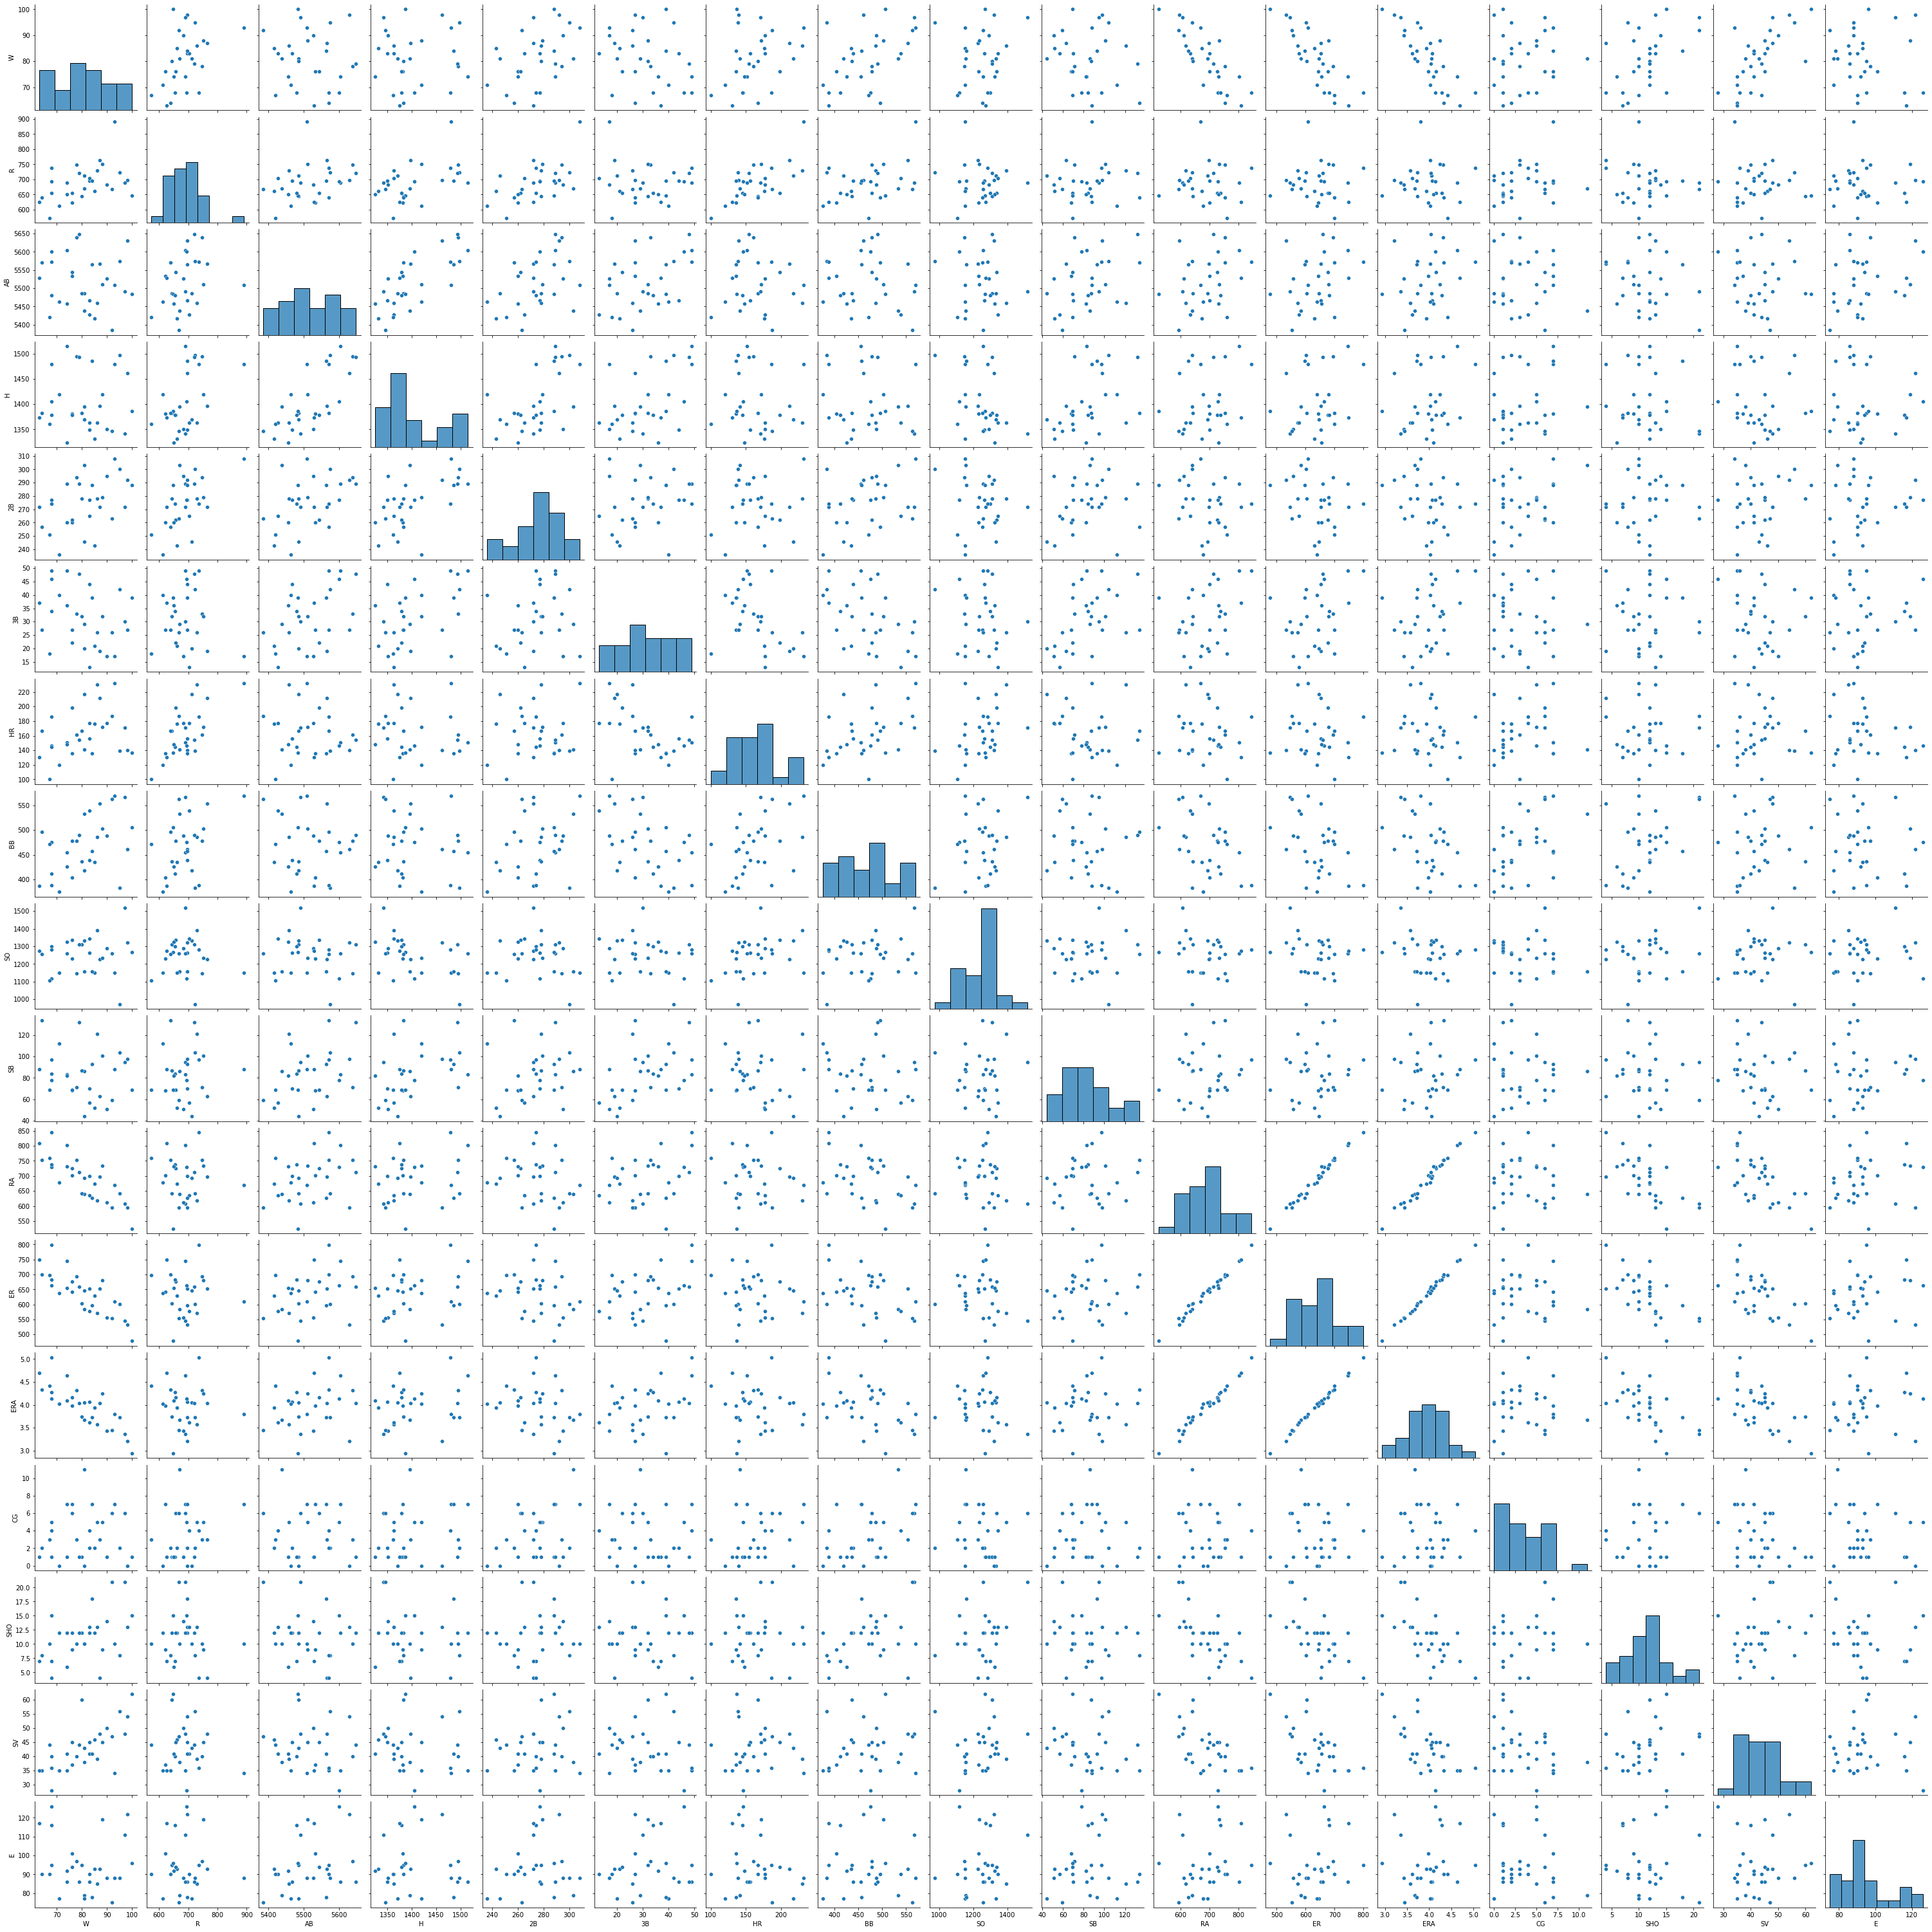

In [33]:
sns.pairplot(base,)

# Let's address the outliers in the dataset

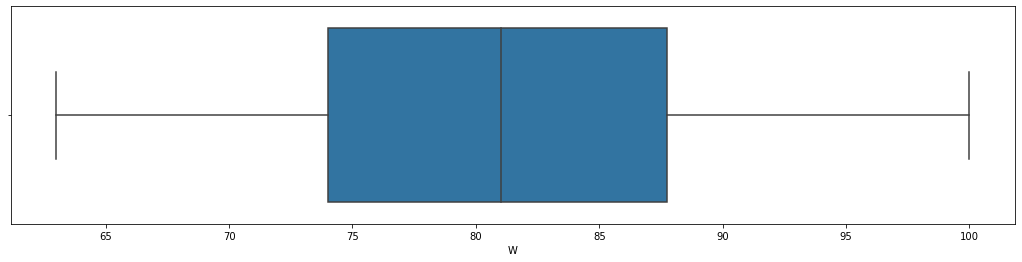

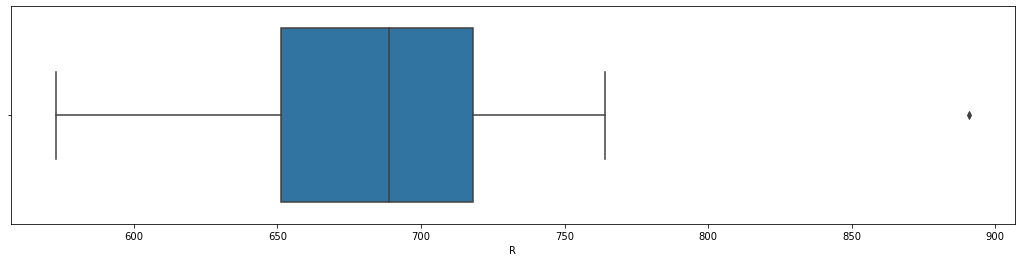

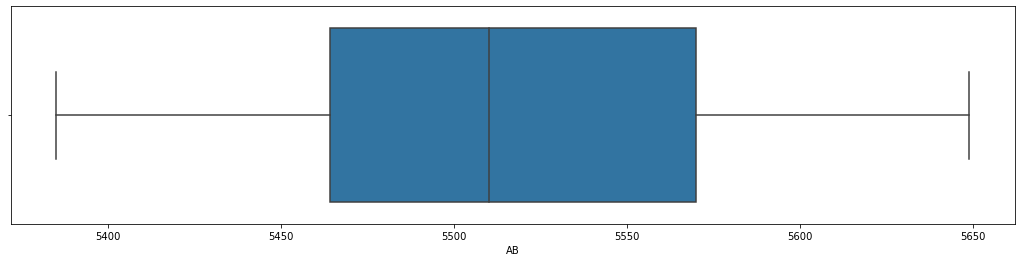

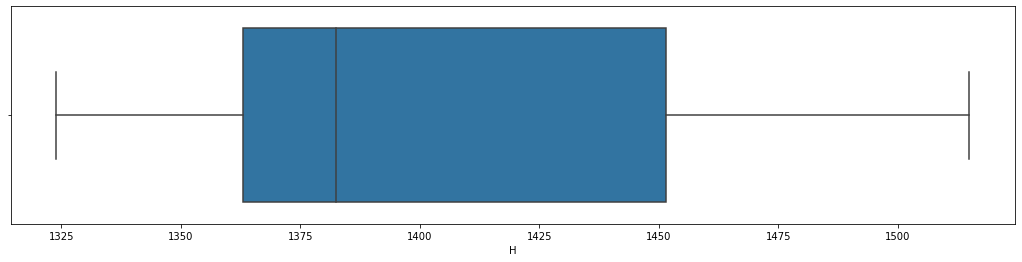

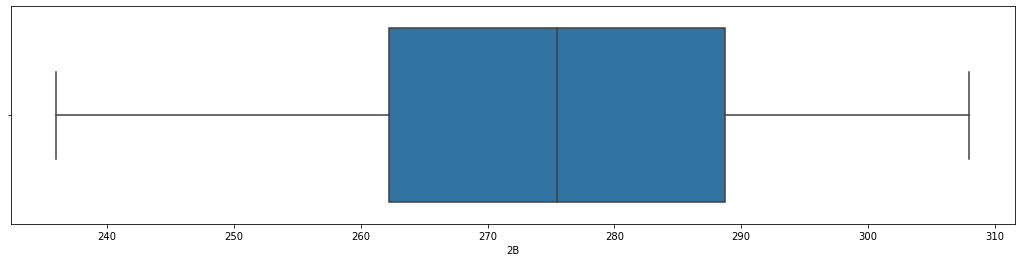

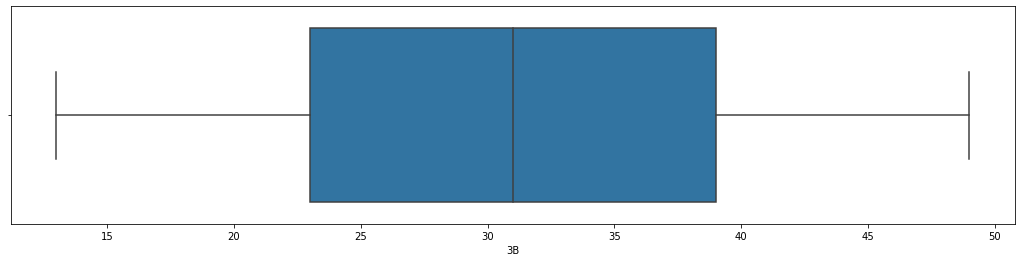

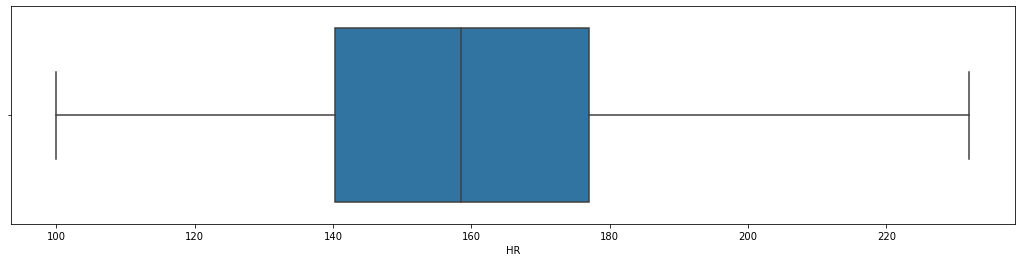

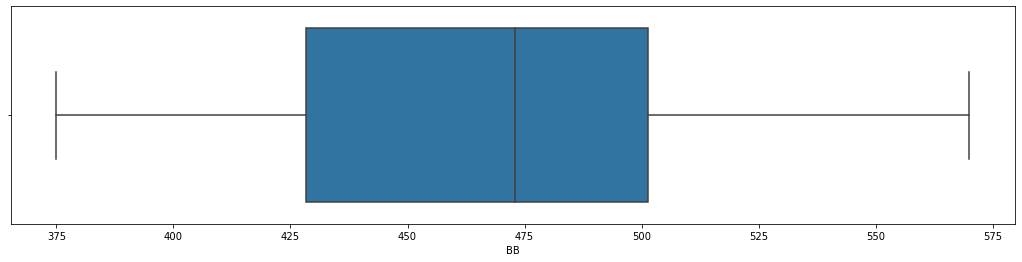

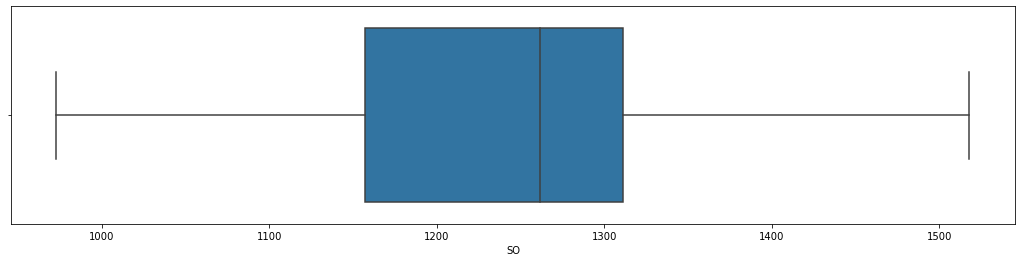

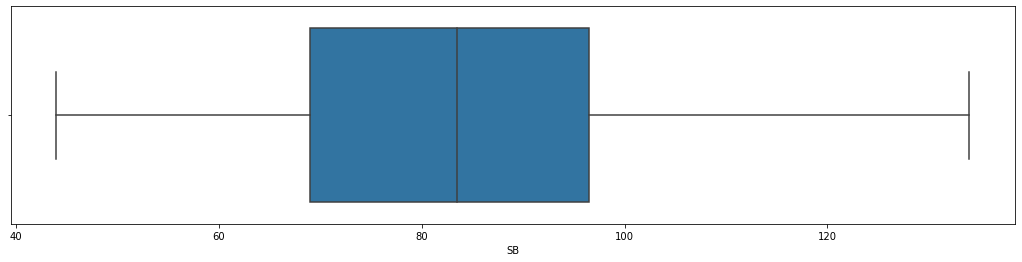

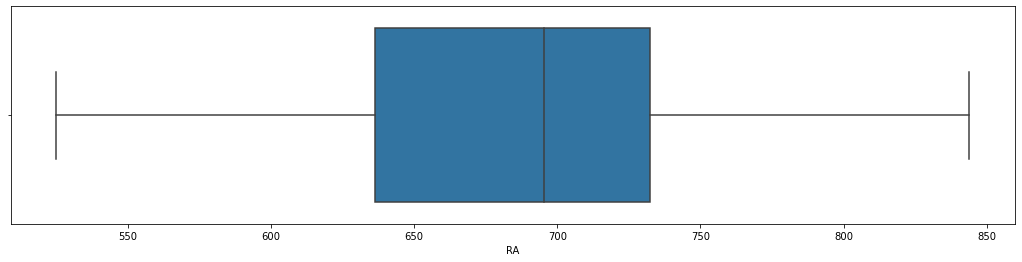

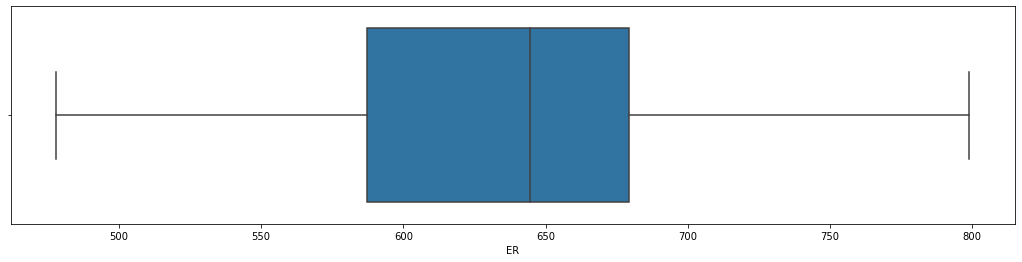

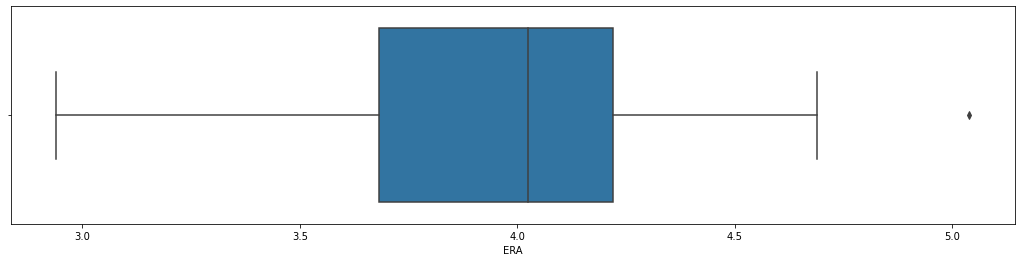

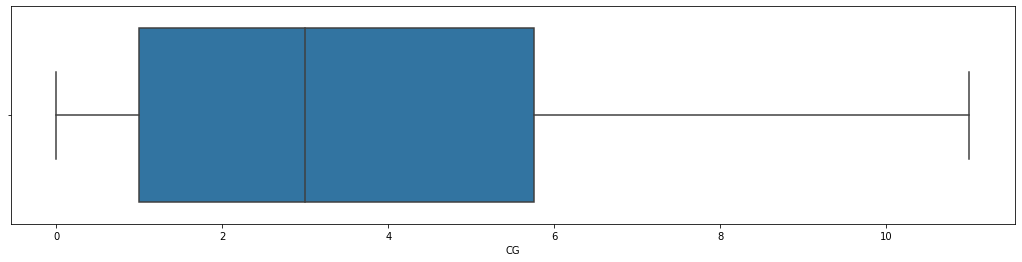

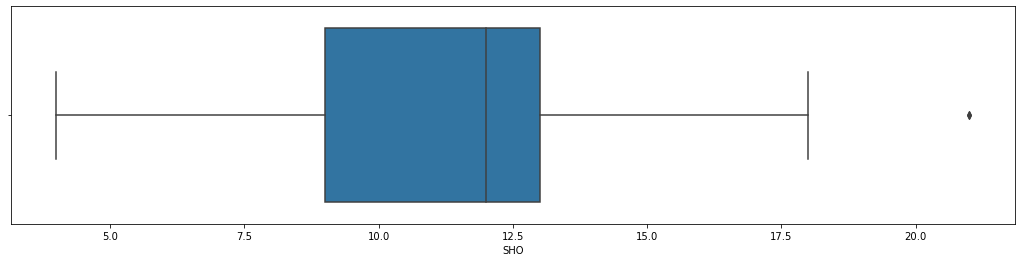

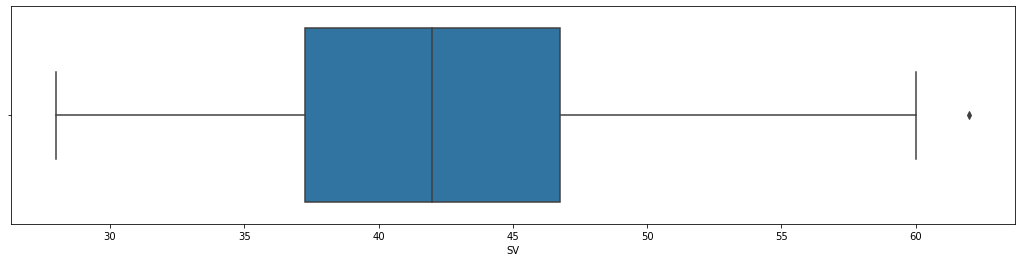

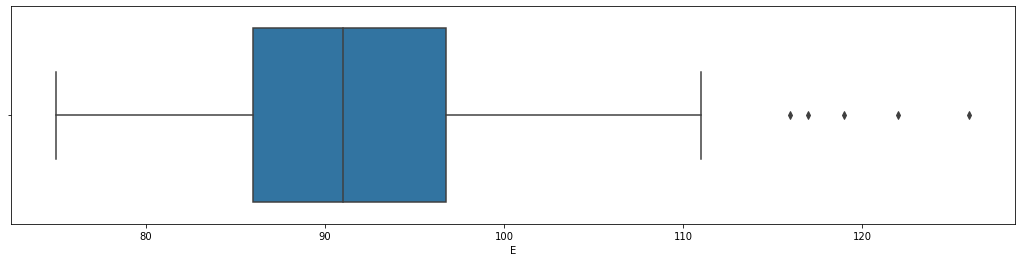

In [34]:
# plotting a box plt for each of the feature seperately:
for col in base:
    plt.figure(figsize=(18,4))
    sns.boxplot(base[col])
    plt.show()

In [35]:
# addressing outliers using the IOR:
Q1 = base.quantile(0.25)
Q3 = base.quantile(0.75)
IQR = Q3 - Q1

base_cleaned = base[~((base < (Q1 - 1.5 * IQR)) |(base > (Q3 + 1.5 * IQR))).any(axis=1)]

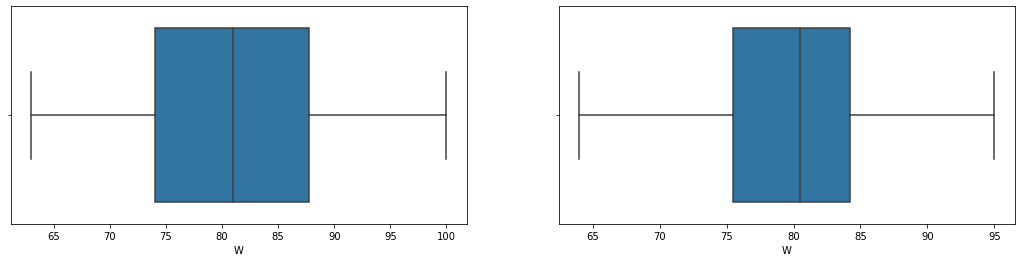

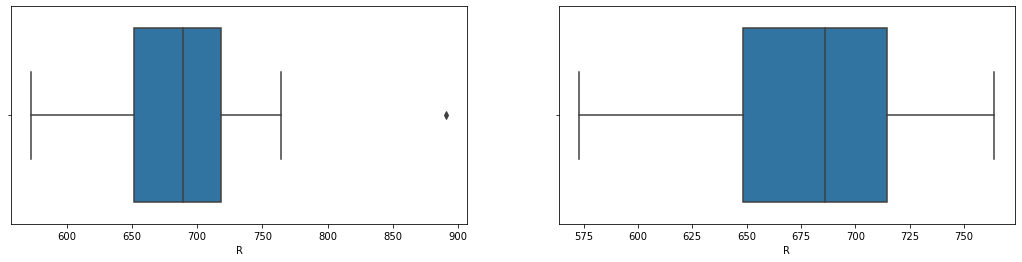

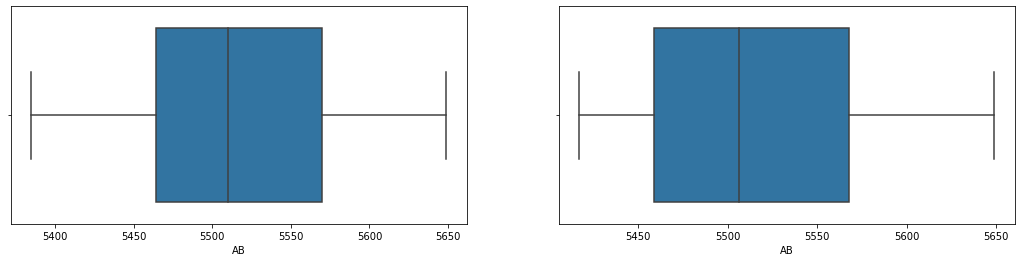

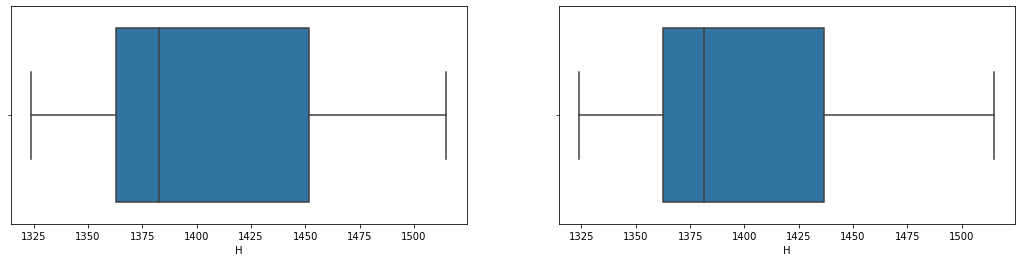

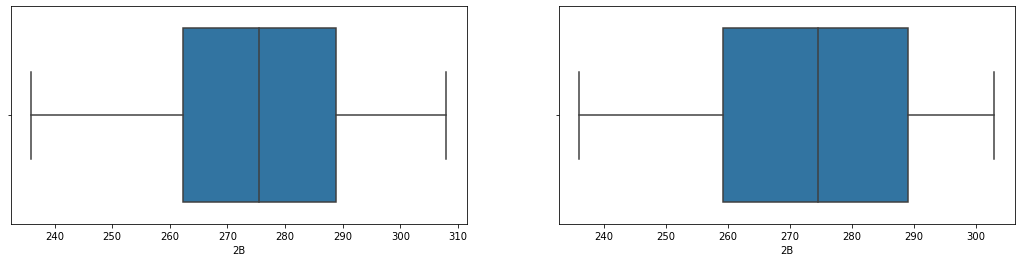

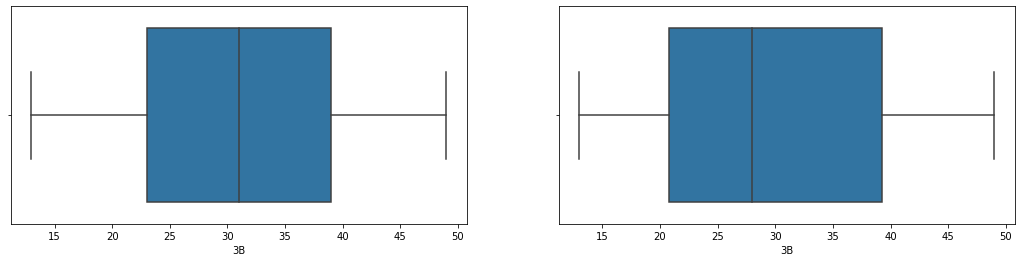

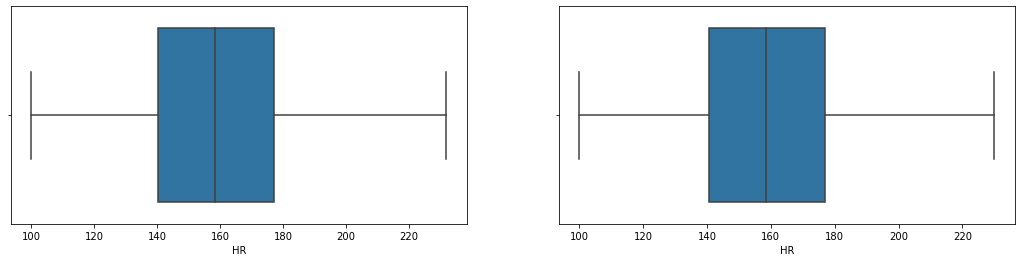

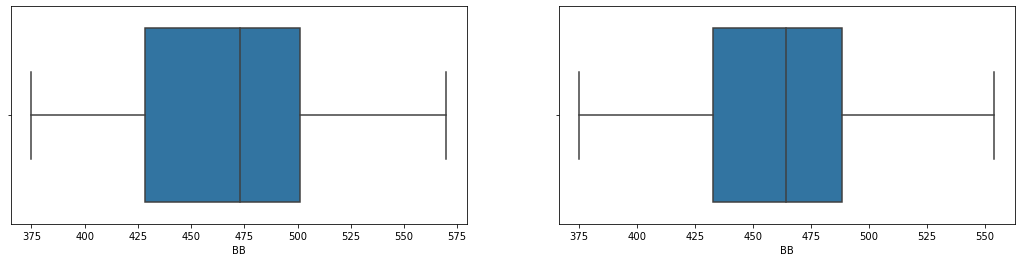

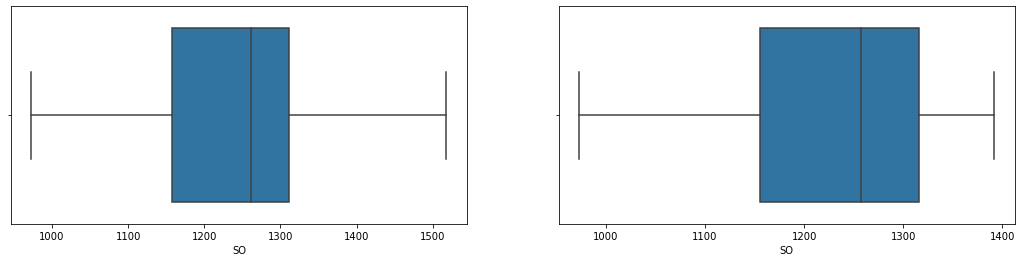

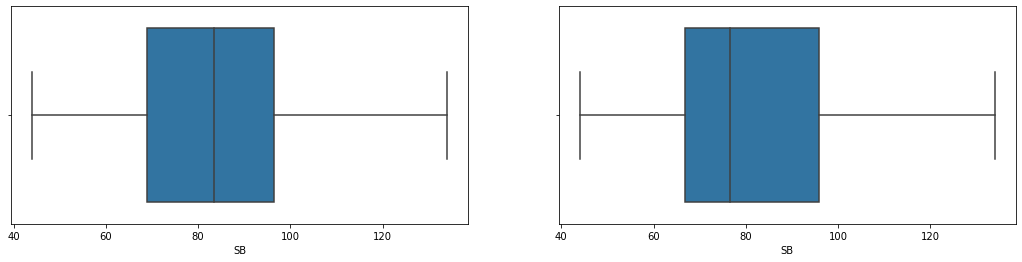

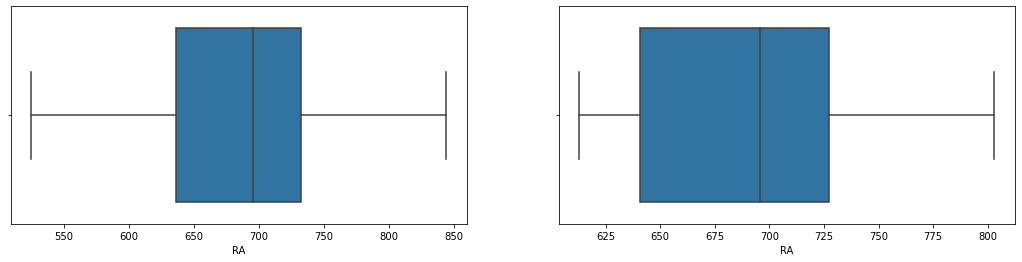

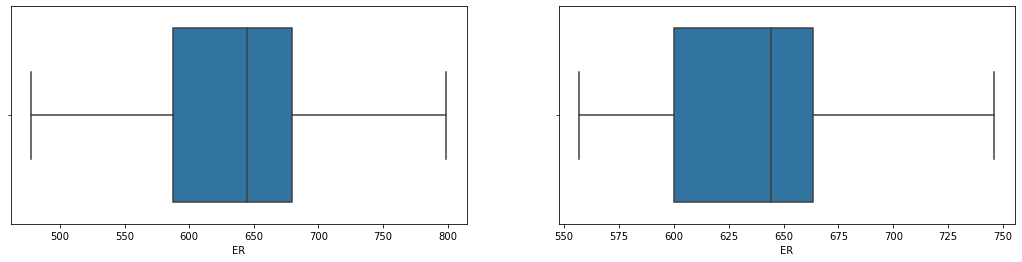

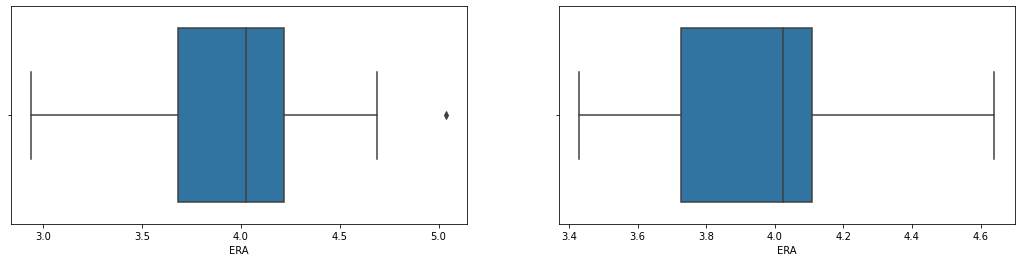

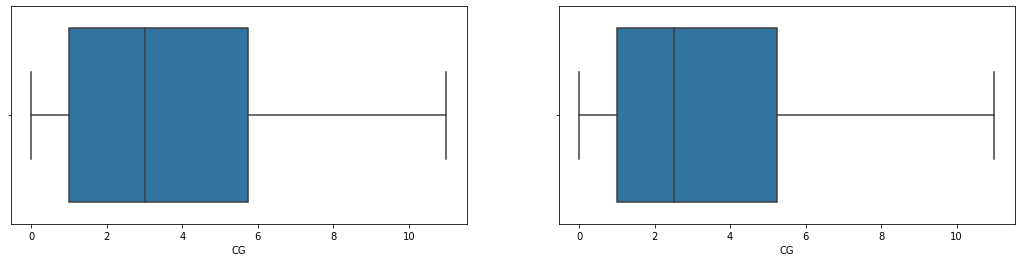

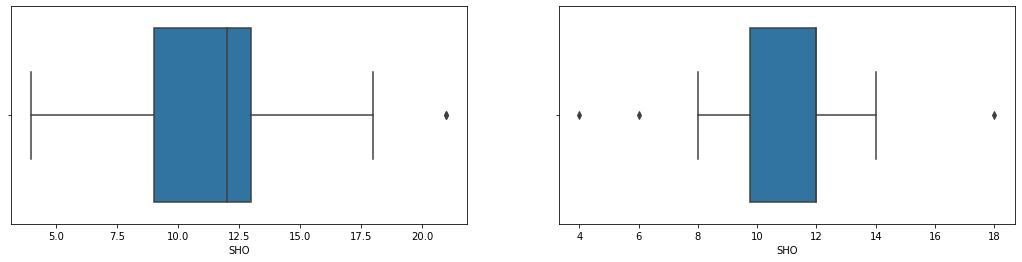

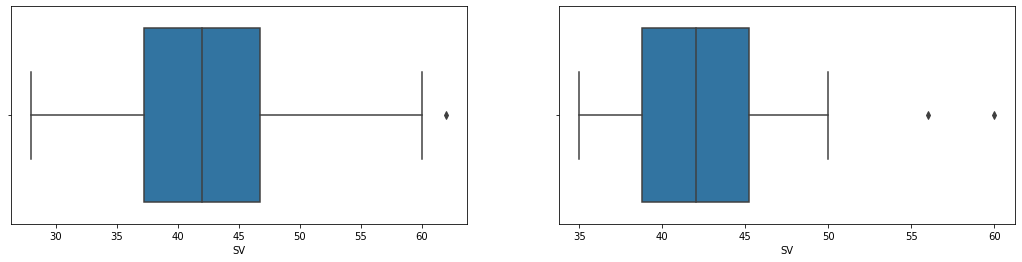

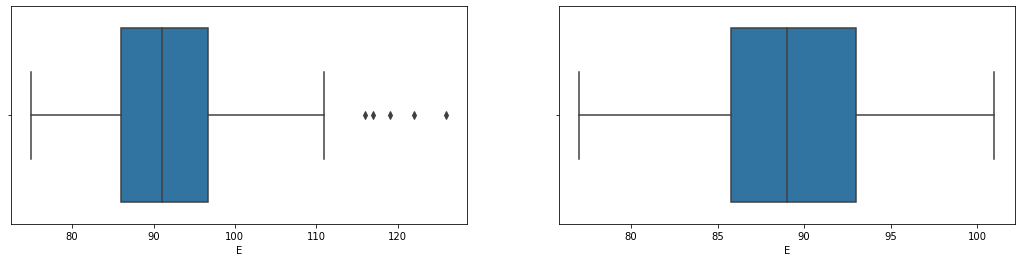

In [36]:
for col in base:
    fig = plt.figure(figsize=(18,4))
    
    fig.add_subplot(121)
    sns.boxplot(base[col])
    
    fig.add_subplot(122)
    sns.boxplot(base_cleaned[col])
    plt.show()

In [37]:
len(base),len(base_cleaned)

(30, 20)

1-When we are removing outliers from the data we are ending up removing 1/3 i.e. 0.333 percent of the data.
2-This is not acceptable, so lets just keep the outliers in the dataset.
   i.e., Let's just stick with our ouriginal dataset with outliers

In [38]:
base.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [39]:
# Let's try log transformation
np.log(base+1).skew()

W     -0.165050
R      0.744813
AB     0.161062
H      0.628584
2B    -0.375085
3B    -0.418009
HR    -0.009528
BB    -0.051289
SO    -0.540637
SB    -0.160463
RA    -0.241950
ER    -0.278793
ERA   -0.243088
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [40]:
# therfore;
base_cleaned = np.log(base + 1)

<AxesSubplot:>

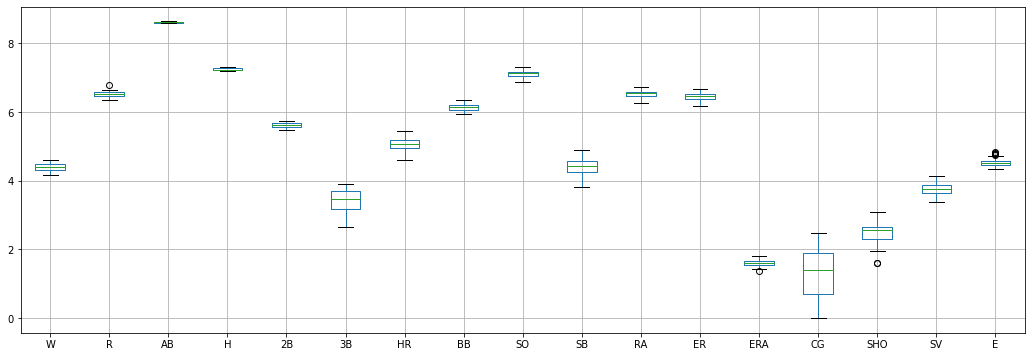

In [41]:
# let's do a complete dataset box plot with the transformed data.
plt.figure(figsize=(18,6))
base_cleaned.boxplot()

In [46]:
# replacing the abbrevations with Complete word redability and enhancing interpretation
base.columns='Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')

In [59]:
base

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:xlabel='Runs', ylabel='Wins'>

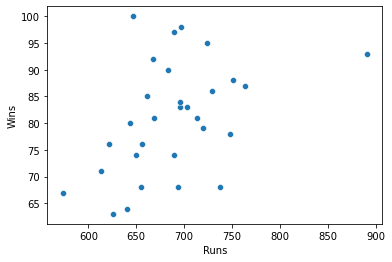

In [60]:
# Wins vs runs
sns.scatterplot(base.Runs,base.Wins)

In [61]:
feature_dict['Runs']

'In baseball, a run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured. A player may score by hitting a home run or by any combination of plays that puts him safely "on base" (that is, on first, second, or third) as a runner and subsequently brings him home.'

<AxesSubplot:xlabel='Doubles', ylabel='Triples'>

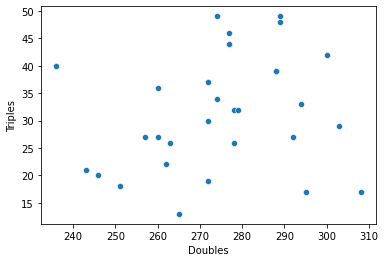

In [62]:
sns.scatterplot(base.Doubles,base.Triples)

<AxesSubplot:xlabel='Errors', ylabel='Wins'>

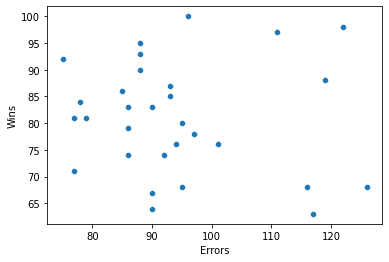

In [63]:
# wins vs erros
sns.scatterplot(base.Errors,base.Wins)

In [64]:
feature_dict['Errors']

'An error (from the Latin error, meaning "wandering") is an action which is inaccurate or incorrect. In some usages, an error is synonymous with a mistake.'

<AxesSubplot:xlabel='Runs_Allowed', ylabel='Runs'>

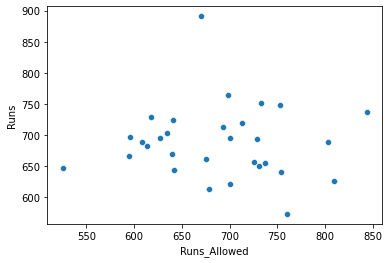

In [65]:
# runs alllowed vs runs scores
sns.scatterplot(base.Runs_Allowed,base.Runs)

In [66]:
# replacing the abbrevations with Complete word redability and enhancing interpretation
base.columns='Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')

In [67]:
# Let's create a Model using the features:
# we will use the log +1 transformed processed dataframe formodel building.
base_cleaned

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,4.564348,6.586172,8.626227,7.311886,5.707110,3.761200,4.941642,5.950643,6.881411,4.653960,6.464588,6.400257,1.553925,1.098612,2.197225,4.043051,4.488636
1,4.430817,6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,6.552508,6.483107,1.623341,1.098612,2.564949,3.828641,4.465908
2,4.406719,6.507278,8.601534,7.241366,5.717028,3.401197,4.955827,6.280396,7.054450,4.465908,6.463029,6.371612,1.541159,2.484907,2.397895,3.663562,4.382027
3,4.343805,6.434547,8.618666,7.231287,5.564520,3.332205,4.919981,6.003887,7.116394,4.234107,6.553933,6.467699,1.605430,2.079442,2.302585,3.637586,4.624973
4,4.317488,6.536692,8.631593,7.323831,5.669881,3.912023,5.023881,6.122493,7.138867,4.430817,6.689599,6.616065,1.729884,2.079442,2.564949,3.583519,4.465908
5,4.543295,6.793466,8.614320,7.300473,5.733341,2.890372,5.451038,6.347389,7.049255,4.488636,6.508769,6.413459,1.568616,2.079442,2.397895,3.555348,4.488636
6,4.477337,6.639876,8.624791,7.242798,5.609472,2.995732,5.361292,6.318968,7.113142,4.158883,6.549651,6.481577,1.615420,1.386294,1.609438,3.891820,4.543295
7,4.406719,6.570883,8.609955,7.223296,5.509388,3.044522,5.384495,6.037871,7.194437,3.806662,6.542472,6.472346,1.619388,0.000000,2.397895,3.784190,4.356709
8,4.394449,6.469250,8.609955,7.232733,5.631212,3.496508,5.123964,6.079933,7.178545,4.477337,6.466145,6.405228,1.556037,0.693147,2.564949,4.110874,4.564348
9,4.369448,6.618739,8.637817,7.310550,5.686975,3.526361,5.087596,6.171701,7.046647,4.276666,6.625392,6.543912,1.669592,1.386294,2.397895,3.713572,4.584967


In [71]:
# let's drop the near perfectly correlated feaatures
base_cleaned.drop(['RA','ER'],1,inplace=True)

In [73]:
# Split the features and the target variables into X and y respectively.
X = base_cleaned.drop('W',1)
y = base_cleaned['W']
# check the shapes
X.shape,y.shape

((30, 14), (30,))

In [74]:
# train _test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((23, 14), (23,), (7, 14), (7,))

In [75]:
# applying standard scaling to the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [77]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [78]:
# let's create a helper function to give us the r2 score and mse score in return
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))    

In [79]:
#  Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 0.002243332452818958
R2_Score 0.8693332554372704


In [80]:
#  Ridge Regression
train_n_ret_scores(Ridge(alpha=0.001))

MSE: 0.0022445413188833204
R2_Score 0.8692628429609367


In [81]:
#  Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 0.002260698472981757
R2_Score 0.8683217418215188


In [82]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 0.0022694205406136466
R2_Score 0.8678137100396566


In [83]:
#  SVR
train_n_ret_scores(SVR(kernel='linear',C=10,gamma=0.001))

MSE: 0.005901364125097321
R2_Score 0.6562649295530079


In [84]:
#  Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 0.007177303929216712
R2_Score 0.5819456282596197


In [85]:
#  Random Forest
train_n_ret_scores(RandomForestRegressor(n_estimators=500))

MSE: 0.00702514830366205
R2_Score 0.5908081935174575


In [86]:
#  Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())


MSE: 0.004668343600356018
R2_Score 0.7280843238405192


In [87]:
#  Adaboost
train_n_ret_scores(AdaBoostRegressor(base_estimator=LinearRegression()))

MSE: 0.0029871913515160174
R2_Score 0.8260059186510423


In [88]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(kernel='linear'),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_base = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_base = models_base.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)

LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR(kernel='linear')
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [89]:
models_base

,Model,MSE,R2,meanCV
0,Linear,0.002243,0.869333,0.497937
1,Ridge,0.002245,0.869263,0.560001
2,Lasso,0.002373,0.861766,0.611066
3,ElasticNet,0.002269,0.867814,0.589938
4,SVR,0.005901,0.656265,-0.234918
5,Descision_Tree,0.009288,0.459016,-2.308734
6,Random_Forest,0.007471,0.564846,-0.823008
7,Gradient_Boost,0.005163,0.699249,-1.189301
8,Ada_Boost,0.002974,0.826751,0.413843


In [90]:
# Best model

best_model = Lasso(alpha=0.001)
best_model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [91]:
train_n_ret_scores(Lasso(alpha=0.0001,))

MSE: 0.0022856579859010227
R2_Score 0.8668679322022921


In [92]:
np.mean(cross_val_score(best_model,X,y))

0.5791466844384766

In [93]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'BaseBall.pkl')


['BaseBall.pkl']